**Problem Statement**

Problem Description : To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.


Forecasting is an important approach to take an optimal decision and implement appropriate action plans. A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

You are expected to create an analytical and modelling framework to predict the life time value of each customer based on the quantitative and qualitative features provided in the dataset and also cluster the train dataset to understand behaviour of each segment.

If y data is skewd do transfromation  and whike testing do exponential

Importing relevant packages and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Train Dataset


In [ ]:
train=pd.read_csv("train-1574429526318.csv")
train.head()


,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


EDA

In [ ]:
train['Income']=train['Income'].replace('?', np.NaN)

In [ ]:
train['Income']=pd.to_numeric(train['Income'])


In [ ]:
train['Income']

0           0
1       63357
2       64125
3       67544
4       19651
        ...  
9801        0
9802    72421
9803    74665
9804    91763
9805    18017
Name: Income, Length: 9806, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08efd91ed0>,
      dtype=object)

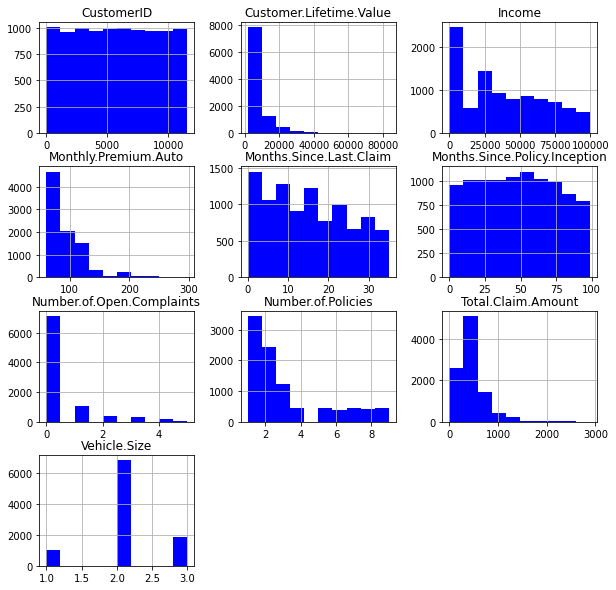

In [ ]:
train.hist(figsize=(10,10),color="b")

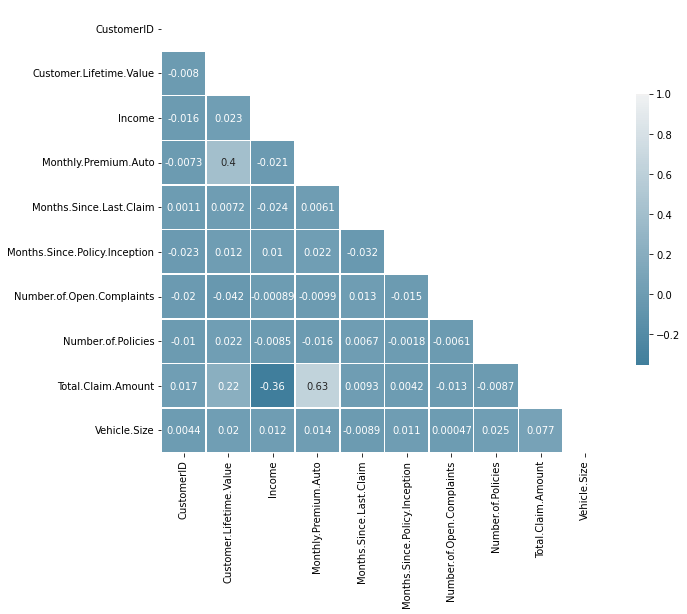

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
mat = train.corr('pearson')#numpy.triu(a, k = 0) : Returns copy of array with upper part of the triangle w.r.t k
mask = np.triu(np.ones_like(mat, dtype=bool))#function returns an array of given shape and type as a given array, with ones.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=1, annot = True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Preprocessing

In [ ]:
x=train.drop(['Customer.Lifetime.Value','Location.Code','Location.Geo'],axis=1)
y=train['Customer.Lifetime.Value']

In [ ]:
new=x.drop('CustomerID',axis=1)

Dividing Numerical values and Categorical

In [ ]:
numeric=new._get_numeric_data()                             
#numeric.info()
cat_train=new.drop(numeric,axis=1)
cat_train=cat_train.astype('category')
numeric.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
0,0.0,67.0,2,33,NaN,2.0,267.214383
1,63357.0,101.0,26,42,0.0,5.0,565.508572
2,64125.0,108.0,3,44,0.0,3.0,369.818708
3,67544.0,116.0,2,15,NaN,3.0,556.800000
4,19651.0,72.0,3,68,0.0,5.0,345.600000


In [ ]:
cat_train.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class'],
      dtype='object')

In [ ]:
cat_cols=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class']

Fill numerical null values with mean

In [ ]:
numeric=numeric.fillna(numeric.mean())

In [ ]:
numeric.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
dtype: int64

Imputing cat null values with Most_frequent

In [ ]:
#cat_train=cat_train.fillna(cat_train.mode())
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='most_frequent')
m=im.fit_transform(cat_train)

In [ ]:
m.shape

(9806, 10)

In [ ]:
cat_train=pd.DataFrame(m,columns=cat_cols)

In [ ]:
cat_train.isnull().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [ ]:
cat_train.shape

(9806, 10)

Convert cat variables in to num variable

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)

result = ohe.fit_transform(cat_train).toarray()
result.shape
#print(ohe.categories_)
#print(result)

(9806, 44)

In [ ]:
cat=pd.DataFrame(result,columns=ohe.get_feature_names())
cat.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(9806, 44)

In [ ]:
x=pd.concat([cat,numeric],axis=1)
x.shape

(9806, 51)

x0_Basic                         0
x0_Extended                      0
x0_Premium                       0
x1_Bachelor                      0
x1_College                       0
x1_Doctor                        0
x1_High School or Below          0
x1_Master                        0
x2_Disabled                      0
x2_Employed                      0
x2_Medical Leave                 0
x2_Retired                       0
x2_Unemployed                    0
x3_F                             0
x3_M                             0
x4_Divorced                      0
x4_Married                       0
x4_Single                        0
x5_Corporate Auto                0
x5_Personal Auto                 0
x5_Special Auto                  0
x6_Corporate L1                  0
x6_Corporate L2                  0
x6_Corporate L3                  0
x6_Personal L1                   0
x6_Personal L2                   0
x6_Personal L3                   0
x6_Special L1                    0
x6_Special L2       

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2323)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6864, 51)
(2942, 51)
(6864,)
(2942,)


Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
train=model.fit(x_train,y_train)

In [ ]:
predtrain=model.predict(x_train)
predtest=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,predtest)))


RMSE for train: 6342.383862505862
RMSE for test: 6038.477800336602


In [ ]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(x_train,y_train)
r_predtest=r.predict(x_test)
r_predtrain=r.predict(x_train)

In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,r_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,r_predtest)))

RMSE for train: 1506.1831874605448
RMSE for test: 3729.069513769504


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor()
k.fit(x_train,y_train)
k_predtest=k.predict(x_test)
k_predtrain=k.predict(x_train)

In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,k_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,k_predtest)))

RMSE for train: 5577.311864801577
RMSE for test: 6451.928473463964


In [ ]:
from sklearn.tree import DecisionTreeRegressor

d=DecisionTreeRegressor()
d.fit(x_train,y_train)
d_predtest=d.predict(x_test)
d_predtrain=d.predict(x_train)

In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,d_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,d_predtest)))

RMSE for train: 1.345608668937504e-13
RMSE for test: 5624.656149590543


In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls_predtest=ls.predict(x_test)
ls_predtrain=ls.predict(x_train)


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,ls_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,ls_predtest)))

RMSE for train: 6342.675002899714
RMSE for test: 6037.841843548606


In [ ]:
from sklearn.linear_model import Ridge
r=Ridge()
r.fit(x_train, y_train)
r_predtest=r.predict(x_test)
r_predtrain=r.predict(x_train)


In [ ]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,r_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,r_predtest)))

RMSE for train: 6342.395224564514
RMSE for test: 6038.219412196347


Loading test dataset

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Hackathon/test-1574429501088.csv")
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


EDA

In [ ]:
test['Income']=test['Income'].replace('?', np.NaN)
test['Income']=pd.to_numeric(test['Income'])

In [ ]:
test=test.drop(['CustomerID','Location.Code','Location.Geo','Vehicle.Size'],axis=1)


Dividing Numerical values and cat values

In [ ]:

numeric_test=test._get_numeric_data()                             
#numeric.info()
cat_test=test.drop(numeric,axis=1)
cat_test=cat_test.astype('category')
cat_test.shape

(1767, 10)

In [ ]:
cat_cols_test=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class']

imputing num variable with mean

In [ ]:
numeric_test=numeric_test.fillna(numeric_test.mean())

imputing cat variable with most_freqent

In [ ]:
#cat_train=cat_train.fillna(cat_train.mode())
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='most_frequent')
m=im.fit_transform(cat_test)

converting cat variables to num variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)

result = ohe.fit_transform(cat_test).toarray()
result.shape
#print(ohe.categories_)
#print(result)

(1767, 44)

In [ ]:
cat_test=pd.DataFrame(result,columns=ohe.get_feature_names())
cat_test.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1767, 44)

In [ ]:
df=pd.concat([cat_test,numeric_test],axis=1)
df.shape

(1767, 51)

In [ ]:
test_perd=model.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x5_nan
Feature names seen at fit time, yet now missing:
- x2_Retired

  warnings.warn(message, FutureWarning)


In [ ]:
test_perd_r=r.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x5_nan
Feature names seen at fit time, yet now missing:
- x2_Retired

  warnings.warn(message, FutureWarning)


In [ ]:
sub=pd.DataFrame({"CustomerID":test['CustomerID'].values,'Customer.Lifetime.Value':test_perd_r})
sub.to_csv("submission1.csv",index=False)
sub=pd.read_csv("/content/submission1.csv")
sub.head()

In [ ]:
k_predtrain=k.predict(df)

In [ ]:
sub=pd.DataFrame({"CustomerID":test['CustomerID'].values,'Customer.Lifetime.Value':k_predtrain})
sub.to_csv("submission2.csv",index=False)
sub=pd.read_csv("/content/submission2.csv")
sub.head()

Clustering


In [ ]:
from sklearn.cluster import  KMeans

standertizing the daa

In [ ]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler().fit_transform(x)
sd
train_std=pd.DataFrame(sd,columns=list(x.columns))

In [ ]:

kmeans_object = KMeans(n_clusters=5,random_state=1234)
kmeans_object.fit(train_std)


KMeans(n_clusters=5, random_state=1234)

In [ ]:
kmeans_clusters = kmeans_object.predict(train_std
                                        )

ploting Elbow method to recognize no.of clusters

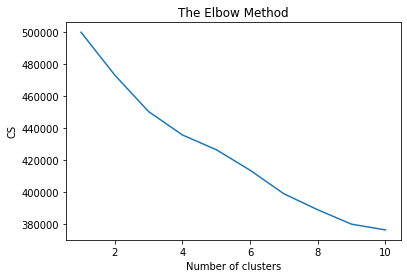

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =123)
    kmeans.fit(train_std)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
best_kmeans = KMeans(n_clusters=7,random_state=1234)

In [ ]:
best_kmeans.fit(train_std)


In [ ]:
best_kmeans_labels = best_kmeans.predict(train_std)
best_kmeans_labels

In [ ]:
kmeans_results = pd.DataFrame({"CustomerID":train['CustomerID'].values,'Customer.Lifetime.Value':best_kmeans_labels})
kmeans_results.head(20)